In [1]:
import numpy as np
from PIL import Image

In [2]:
N_GENERATIONS = 30
IMG_SIZE = 512  # Dimension: IMG_SIZE X IMG_SIZE
IMG_DIVISION = 512  # Minimum is 2, maximum is IMG_SIZE

In [3]:
PATH = 'init_img/lisa.jpg'

In [4]:
def getMatrixFromImage(path):
    pixels = Image.open(path).convert('RGB')
    return np.asarray(pixels, dtype=np.uint8)

In [5]:
def showImageFromMatrix(array, save=False):
    img = Image.fromarray(array, 'RGB')
    img.show()
    if save:
        img.save('final_img/final.png')

In [6]:
def getFitness(img):
    ans = np.zeros(len(img))
    for i in range(len(img)):
        if sum(sum(img[i])) > 666:
            ans[i] = 1
        else:
            ans[i] = -1
    return ans

In [7]:
def mutation(img, mut, imgLen):
    kid = np.copy(img)
    randStart = np.random.randint(0, IMG_SIZE - imgLen - 1)
    mutSelected = mut[randStart: randStart + imgLen]
    for fitness, i in zip(getFitness(img), range(imgLen)):
        if fitness > 0:
            kid[i] += mutSelected[i] // 30
        else:
            kid[i] -= mutSelected[i] // 30
    return kid

In [8]:
def makeKid(img, mut):
    kids = np.copy(img)
    imgLen = IMG_SIZE // IMG_DIVISION
    for i in range(IMG_DIVISION):
        kids[i * imgLen: (i + 1) * imgLen] = mutation(img[i * imgLen:(i + 1) * imgLen], mut, imgLen)
    return kids

In [9]:
mutationArr = getMatrixFromImage(PATH)

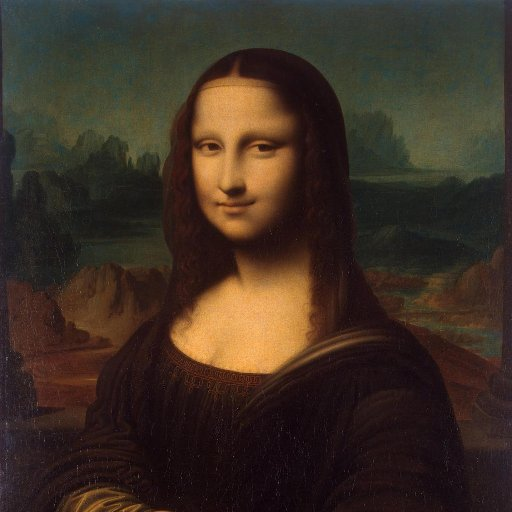

In [10]:
initArr = getMatrixFromImage(PATH)
Image.fromarray(initArr)

In [11]:
for i in range(N_GENERATIONS):
        initArr = makeKid(initArr, mutationArr)

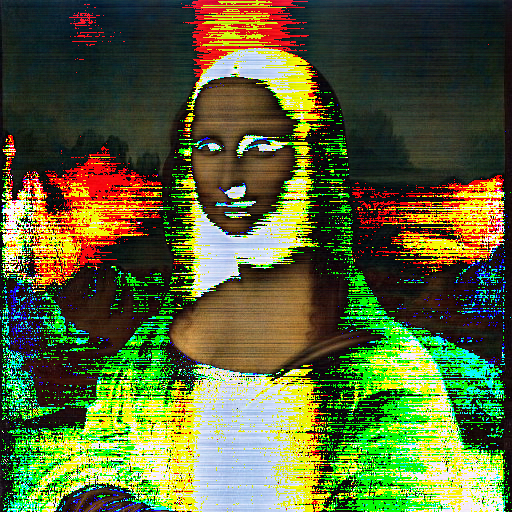

In [12]:
Image.fromarray(initArr)